MOUNT DRIVE

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## **Three Combined models**

In [8]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Step 1: Data Preparation
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/emails.csv')

# Handling missing values
df.fillna(method='ffill', inplace=True)

# Encoding categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Scaling numerical features
scaler = StandardScaler()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Separating features and target variable
# Instead of 'Email No.', choose the appropriate column for your target variable
# For example, if you have a column named 'spam' indicating whether an email is spam (1) or not (0), use that.
print(df.columns)  # Print columns to identify the correct target variable column
X = df.drop('spam', axis=1)  # Replace 'spam' with the actual column name
y = df['spam']  # Replace 'spam' with the actual column name

# Check if the target variable is continuous
if y.dtype in ['int64', 'float64']:
    # If continuous, convert to categorical if appropriate for your problem.
    # For example, you could use a threshold to create binary classes (spam/not spam).
    threshold = 0  # Example threshold, adjust as needed
    y = (y > threshold).astype(int)  # Convert to 1 (spam) if above threshold, 0 (not spam) otherwise
    print("Target variable converted to categorical.")
else:
    print("Target variable is already categorical.")

# ... (Rest of your code remains the same)

# Step 2: Model Selection
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Machine': SVC()
}

# Step 3: Model Training
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training and evaluating models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Step 4: Model Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")

    # Generating Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("\n" + "="*60 + "\n")

# Pro Tips: Experiment with ensemble methods and hyperparameter tuning

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf_scores = cross_val_score(rf, X, y, cv=5)
print(f"Random Forest Cross-Validation Score: {rf_scores.mean()}")

# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb_scores = cross_val_score(gb, X, y, cv=5)
print(f"Gradient Boosting Cross-Validation Score: {gb_scores.mean()}")

# Hyperparameter Tuning with Grid Search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters found by Grid Search:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

<ipython-input-8-c2685aa391a1>:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)
Target variable converted to categorical.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.9971014492753624
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1024
           1       0.90      0.82      0.86        11

    accuracy                           1.00      1035
   macro avg       0.95      0.91      0.93      1035
weighted avg       1.00      1.00      1.00      1035



Model: Decision Tree
Accuracy: 0.9951690821256038
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1024
           1       0.75      0.82      0.78        11

    accuracy                           1.00      1035
   macro avg       0.87      0.91      0.89      1035
weighted avg       1.00      1.00      1.00      1035



Model: Support Vector Machine
Accuracy: 0.9951690821256038
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1024

# **Logistic Regression Model & Classification Report**

<ipython-input-13-80b5a0d2c020>:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


Target variable converted to binary.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9971014492753624
Precision: 0.9
Recall: 0.8181818181818182
F1 Score: 0.8571428571428572

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1024
           1       0.90      0.82      0.86        11

    accuracy                           1.00      1035
   macro avg       0.95      0.91      0.93      1035
weighted avg       1.00      1.00      1.00      1035


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1024
           1       0.90      0.82      0.86        11

    accuracy                           1.00      1035
   macro avg       0.95      0.91      0.93      1035
weighted avg       1.00      1.00      1.00      1035


Confusion Matrix:
[[1023    1]
 [   2    9]]


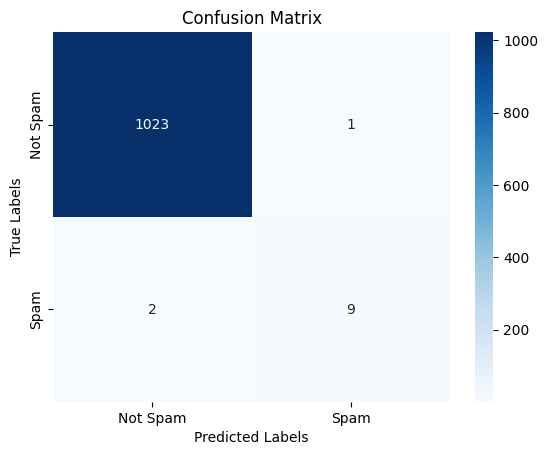

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Cross-Validation Scores: [0.9884058  0.99806763 0.99323017 0.99709865 0.99516441]
Mean Cross-Validation Score: 0.9943933320251543


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

# Step 1: Data Preparation
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/emails.csv')

# Handling missing values
df.fillna(method='ffill', inplace=True)

# Encoding categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Scaling numerical features
scaler = StandardScaler()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Separating features and target variable
X = df.drop('spam', axis=1)  # Replace 'spam' with the actual column name if different
y = df['spam']

# Ensure the target variable is binary (0 or 1)
# Adjust the condition and conversion logic as needed for your specific problem
if y.dtype in ['int64', 'float64']:
    threshold = 0.5  # Example threshold, adjust as needed
    y = (y > threshold).astype(int)  # Convert to 1 if above threshold, 0 otherwise
    print("Target variable converted to binary.")

# Step 2: Model Selection
# Using Logistic Regression as the chosen model
model = LogisticRegression()

# Step 3: Model Training
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Logistic Regression model
model.fit(X_train, y_train)

# Step 4: Model Evaluation
# Predicting on the test data
y_pred = model.predict(X_test)

# Calculating evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Printing the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Generating and printing the Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generating and printing the Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Creating and displaying the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualizing the confusion matrix using Seaborn
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Cross-validation to ensure generalization
cross_val_scores = cross_val_score(model, X, y, cv=5)
print(f"\nCross-Validation Scores: {cross_val_scores}")
print(f"Mean Cross-Validation Score: {cross_val_scores.mean()}")

# **Decision Tree & Classification Report**


Confusion Matrix:
[[1079   18]
 [  19  436]]


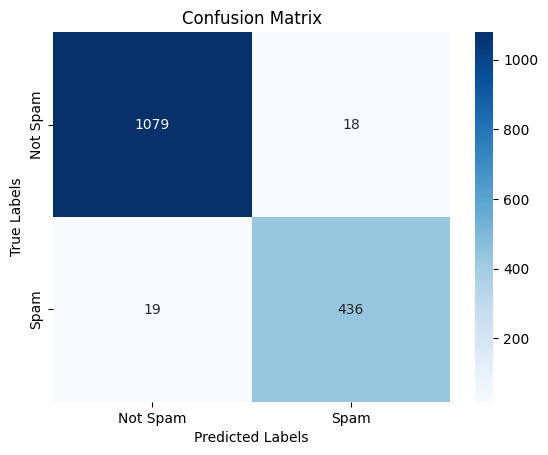

Confusion Matrix:
 [[1079   18]
 [  19  436]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1097
           1       0.96      0.96      0.96       455

    accuracy                           0.98      1552
   macro avg       0.97      0.97      0.97      1552
weighted avg       0.98      0.98      0.98      1552

Accuracy: 97.62%
Precision: 97.61%
Recall: 97.62%
F1-Score: 97.62%

Cross-Validation Mean Accuracy: 95.75%


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/emails.csv')

# Drop the "Email No." column
df = df.drop(columns=["Email No."])

# Check for missing values
if df.isnull().sum().sum() > 0:
    df = df.dropna()

# Split the data into features and target variable
X = df.drop(columns=["Prediction"])
y = df["Prediction"]

# Scale the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train a Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Perform cross-validation
cross_val_scores = cross_val_score(model, X_scaled, y, cv=5)
# Creating and displaying the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualizing the confusion matrix using Seaborn
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Output the results
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1-Score: {:.2f}%".format(f1 * 100))
print("\nCross-Validation Mean Accuracy: {:.2f}%".format(cross_val_scores.mean() * 100))


# **SVM & Classification report**


Confusion Matrix:
[[1091    6]
 [  90  365]]


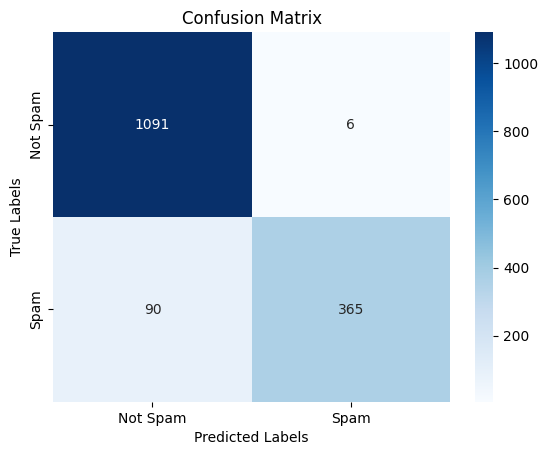

Confusion Matrix:
 [[1091    6]
 [  90  365]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.96      1097
           1       0.98      0.80      0.88       455

    accuracy                           0.94      1552
   macro avg       0.95      0.90      0.92      1552
weighted avg       0.94      0.94      0.94      1552

Accuracy: 93.81%
Precision: 94.14%
Recall: 93.81%
F1-Score: 93.61%

Cross-Validation Mean Accuracy: 92.11%


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/emails.csv')

# Data Preparation
# Drop the "Email No." column (assuming it's irrelevant for classification)
df = df.drop(columns=["Email No."])

# Handle missing values by dropping rows with any missing data
df = df.dropna()

# Split the data into features and target variable
X = df.drop(columns=["Prediction"])
y = df["Prediction"]

# Scale the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Model Training
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train the SVM classifier
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Predict on the test data
y_pred = svm_model.predict(X_test)

# Model Evaluation
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Generate the classification report
class_report = classification_report(y_test, y_pred)
# Creating and displaying the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualizing the confusion matrix using Seaborn
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
# Calculate additional performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Perform cross-validation
cross_val_scores = cross_val_score(svm_model, X_scaled, y, cv=5)

# Output the results
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1-Score: {:.2f}%".format(f1 * 100))
print("\nCross-Validation Mean Accuracy: {:.2f}%".format(cross_val_scores.mean() * 100))
